In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
plt.rcParams['figure.figsize'] = [10, 10]

In [3]:
range_min= 0.45
range_max= 10.0
angle_min= -0.521567881107
angle_max= 0.524276316166
angle_increment= 0.00163668883033

In [8]:
a=!cat ../data/ranges.txt

In [9]:
ranges = np.array([float(x) for x in a[0].strip().strip('[]').split(',')])

In [25]:
def ranges2cart(ranges, range_min, range_max, angle_min, angle_increment):
    imgsize = 100
    rangestep = range_max/imgsize
    ranges = np.array(ranges)
    r, phi = np.mgrid[0:range_max:rangestep,-np.pi:np.pi:angle_increment]
    phimin_index = int((angle_min+np.pi)/angle_increment)
    ranges2d = np.zeros(r.shape)
    ranges2d[:,phimin_index:phimin_index+ranges.shape[0]]=ranges
    ranges2d[np.isnan(ranges2d)] = range_max*2
    v = np.zeros(r.shape)
    v[r>ranges2d] = 0
    v[r<ranges2d] = -1
    v[r<range_min] = 0
    v[(ranges2d!=0) & (ranges2d!=range_max) & (np.abs(r-ranges2d)<0.1)] =1
    v *= np.cos(r/range_max)
    return v
    dst = cv2.linearPolar(v.T, (imgsize,imgsize),imgsize,cv2.WARP_FILL_OUTLIERS | cv2.WARP_INVERSE_MAP)
    return dst
    dst2 = np.zeros((imgsize*2,imgsize*2))
    dst2[:,imgsize:] = dst[:imgsize*2,:][:,::-1] 
    return dst2

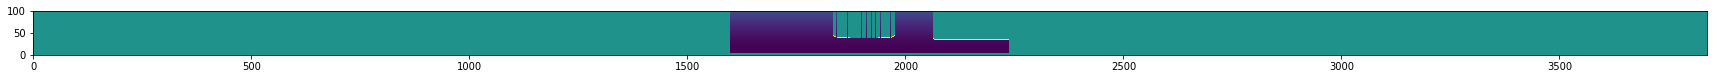

In [32]:
plt.figure(figsize=(30,10))
l0 = ranges2cart(ranges,range_min,range_max, angle_min, angle_increment)
plt.ylim(0,100)
plt.imshow(l0[:,::-1],)

In [6]:
ranges[:10]

array([3.58638954, 3.58474302, 3.58310175, 3.58146667, 3.5782125 ,
       3.57659388, 3.57498074, 3.57337379, 3.57177234, 3.57017684])

In [60]:
import laserscan
import particle
reload(laserscan)
reload(particle)

<module 'particle' from 'particle.pyc'>

In [66]:
scan = laserscan.rangeMatrix(ranges, angle_min, angle_max)
scan

array([[-0.52156788,  3.58638954],
       [-0.51993119,  3.58474302],
       [-0.5182945 ,  3.58310175],
       ...,
       [ 0.52100294,         nan],
       [ 0.52263963,         nan],
       [ 0.52427632,         nan]])

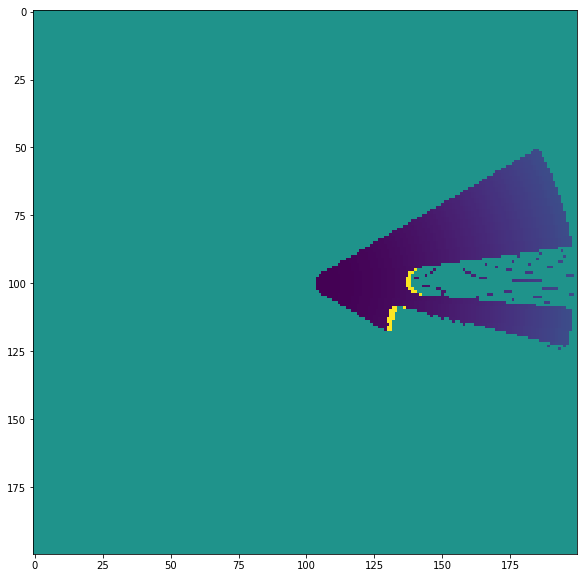

In [68]:
l1 = laserscan.ranges2cart(ranges, range_min, range_max, angle_min, angle_increment)
plt.imshow(l1)

In [69]:
np.array([[1,2],[2,3],[3,4]]) + np.array([100,200])

array([[101, 202],
       [102, 203],
       [103, 204]])

In [91]:
reload(laserscan)

<module 'laserscan' from 'laserscan.py'>

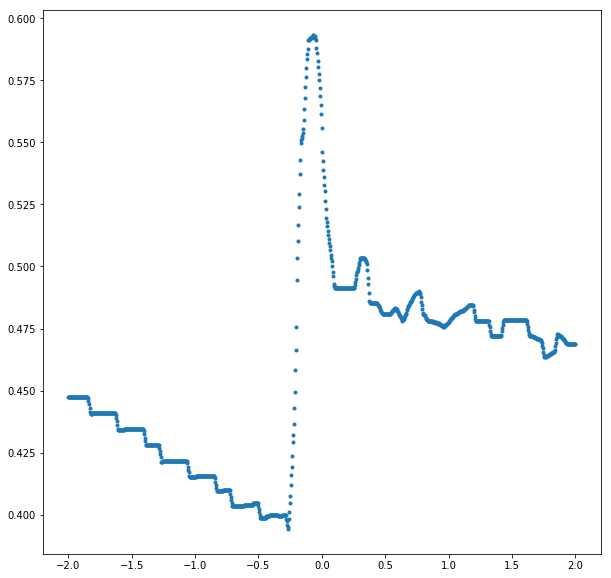

In [104]:
a = np.linspace(-2,2,1000)
b = [laserscan.score((x,0), 0, l1 ,10.0, (100,100), scan) for x in a]
plt.plot(a,b,'.')

In [111]:
np.rint?

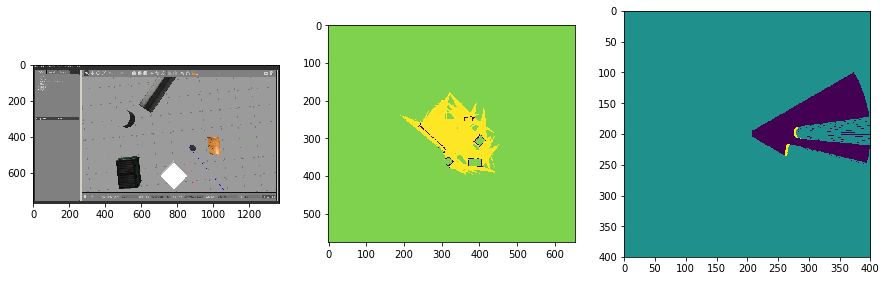

In [10]:
screenshot = cv2.cvtColor(cv2.imread('Screenshot.png'), cv2.COLOR_BGR2RGB)
map2 = cv2.cvtColor(cv2.imread('map2.pgm'), cv2.COLOR_BGR2RGB)[:,:,0]
map2 = cv2.resize(map2,None,fx=1.2, fy=1.2, interpolation = cv2.INTER_NEAREST)
fig, axarr = plt.subplots(1,3)
axarr[0].imshow(screenshot)
axarr[1].imshow(map2)
axarr[2].imshow(laserscan)
fig.set_size_inches((15,5))

In [11]:
map3 = map2.astype(float)

In [12]:
set(map2.flatten())

{0, 205, 254}

In [13]:
map3[map2==0]=1
map3[map2==205]=0
map3[map2==254]=-1
map3.shape, set(map3.flat)

((576, 653), {-1.0, 0.0, 1.0})

In [17]:
np.cos(1)

0.5403023058681398

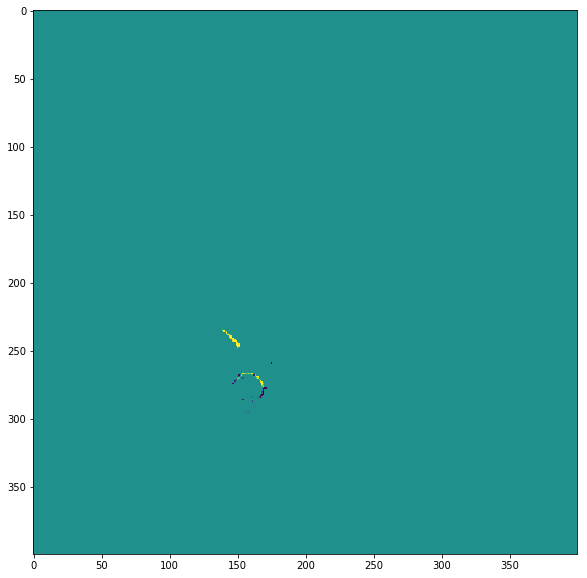

In [40]:
rows,cols = laserscan.shape
M = cv2.getRotationMatrix2D((cols/2,rows/2),240,1)
map4 = map3.copy()
map4 = map4[85:,160:][:400,:400]
map4[map4<0]=0 # mapa apenas com obstaculos
map4*=cv2.warpAffine(laserscan,M,(cols,rows))
plt.imshow(map4)

In [44]:
def trypos(worldmap, localmap, x, y, rot):
    rows,cols = localmap.shape
    M = cv2.getRotationMatrix2D((rows/2,cols/2),rot*180/np.pi,1)
    map4 = worldmap.copy()
    map4 = map4[x-rows/2:,y-cols/2:][:rows,:cols]
    map4[map4<0]=0 # mapa apenas com obstaculos
    map4*=cv2.warpAffine(localmap,M,(cols,rows))
    return sum(map4.flat)

In [45]:
trypos(map3,laserscan, 285, 360, 240*np.pi/180)

23.8251953125

In [ ]:
def showboth(worldmap, localmap, x,y, rot):
    rows,cols = localmap.shape
    M = cv2.getRotationMatrix2D((cols/2,rows/2),rot*180/np.pi,1)
    res = np.zeros((max([worldmap.shape[0],rows/2+x]),max(worldmap.shape[1],cols/2+y)))
    res[:worldmap.shape[0],:worldmap.shape[1]] = worldmap.copy()
    res[res<0]=0 # mapa apenas com obstaculos
    res[x-rows/2:,y-cols/2:][:rows,:cols] += cv2.warpAffine(localmap,M,(rows,cols))
#     rows,cols = laserscan.shape
#     M = cv2.getRotationMatrix2D((cols/2,rows/2),rot*180/np.pi,1)
#     map4 = worldscan.copy()
#     map4 = map4[x:,y:][:rows,:cols]
#     map4[map4<0]=0 # mapa apenas com obstaculos
#     map4+=cv2.warpAffine(laserscan,M,(cols,rows))
    plt.imshow(res)

In [32]:
a = np.zeros((100,100))

In [35]:
a[50:,50:][:100,:100].shape

(50, 50)

In [31]:
showboth(map3,laserscan, 86,150,240)

ValueError: operands could not be broadcast together with shapes (114,50) (400,400) (114,50) 

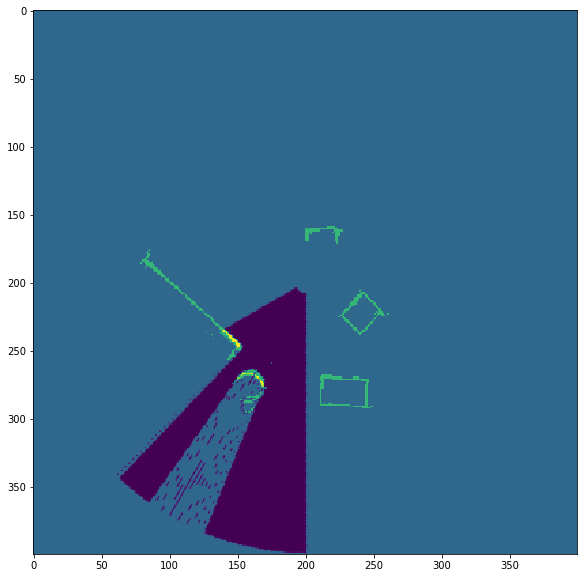

In [20]:
showboth(map3, laserscan, 85,160,240*np.pi/180)

In [560]:
best = (85,160,240*np.pi/180)
bestresult = trypos(map3, laserscan, *best)

In [639]:
def localrandom(worldmap, laserscan, x, y, rot, smallmax=5, bigmax=15):
    best = (x, y, rot)
    bestresult = trypos(map3, laserscan, *best)
    small = 0
    big = 0
    while(big<bigmax and small<smallmax):
        small += 1
        big += 1
        x = np.random.normal()
        y = np.random.normal()
        alpha = np.random.normal()/150
        sample = (int(x+best[0]), int(y+best[1]), alpha + best[2])
        sampleresult = trypos(map3, laserscan, *sample)
        if sampleresult > bestresult:
            small = 0
            best = sample
            bestresult = sampleresult
    return best, bestresult

In [640]:
def localbest(worldmap, laserscan, x, y, rot, maxattempts=200, curresult=None, angle_increment=0.00163668883033):
    if curresult is None:
        curresult = trypos(map3, laserscan, x, y, rot)
    if maxattempts > 0:
        for dx,dy,drot in [( 1, 0,0),
                           (-1, 0,0),
                           ( 0, 1,0),
                           ( 0,-1,0),
                           ( 0, 0, angle_increment),
                           ( 0, 0,-angle_increment)
                          ]:
            maxattempts -= 1
            sample = (x+dx, y+dy, rot+drot)
            sampleresult = trypos(map3, laserscan, *sample)
            if sampleresult > curresult:
                return localbest(worldmap, laserscan, *sample, maxattempts=maxattempts, curresult=sampleresult)
    return (x,y,rot), curresult

In [641]:
%time best, bestresult=localbest(map3, laserscan, 85, 160, 240*np.pi/180)
best, bestresult

CPU times: user 556 ms, sys: 6.85 ms, total: 563 ms
Wall time: 519 ms


((85, 160, 4.196973648938041), 25.79296875)

In [642]:
%time best, bestresult=localrandom(map3, laserscan, 85, 160, 240*np.pi/180)
best, bestresult

CPU times: user 194 ms, sys: 0 ns, total: 194 ms
Wall time: 185 ms


((85, 160, 4.1887902047863905), 23.8251953125)

In [643]:
0.5*np.pi/180

0.008726646259971648

In [645]:
for x in range(10):
    print localrandom(map3, laserscan, 85, 160, 240*np.pi/180)

((85, 160, 4.1887902047863905), 23.8251953125)
((85, 160, 4.195754303898478), 25.556640625)
((85, 160, 4.192726690869678), 25.4580078125)
((85, 160, 4.191002234692896), 24.5791015625)
((85, 160, 4.194660903155956), 25.73046875)
((85, 160, 4.192245277793907), 25.314453125)
((85, 160, 4.191033788471095), 24.6044921875)
((85, 160, 4.1887902047863905), 23.8251953125)
((85, 160, 4.1887902047863905), 23.8251953125)
((85, 160, 4.190606036074756), 24.5380859375)


((85, 160, 4.1887902047863905), 23.8251953125)
((85, 160, 4.1887902047863905), 23.8251953125)
((85, 160, 4.1887902047863905), 23.8251953125)
((85, 160, 4.1887902047863905), 23.8251953125)
((85, 160, 4.1887902047863905), 23.8251953125)
((85, 160, 4.1887902047863905), 23.8251953125)
((85, 160, 4.1887902047863905), 23.8251953125)
((85, 160, 4.191472321266549), 24.8720703125)
((85, 160, 4.190775637218786), 24.5126953125)
((85, 160, 4.1887902047863905), 23.8251953125)


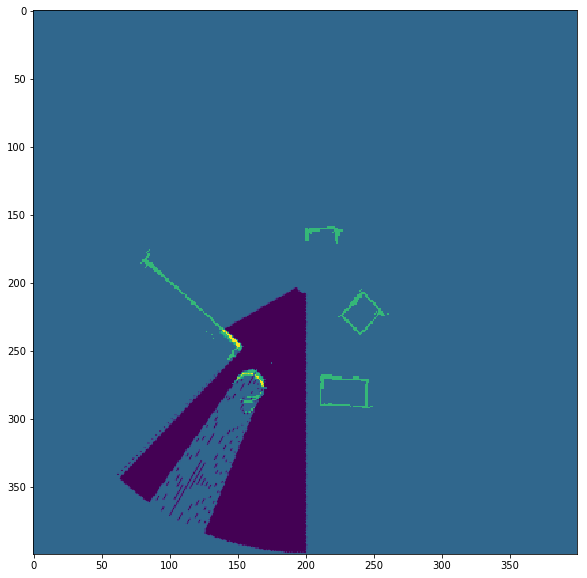

In [502]:
showboth(map3, laserscan, *best)

In [3]:
import collections
import numpy as np

In [7]:
def a_star(start, goal, h, neighbors):
    todo = set()
    done = set()
    came = {}
    g = collections.defaultdict(np.inf)
    g[start] = 0
    f = collections.defaultdict(np.inf)
    f[start] = h(start, goal)
    while(len(todo)>0):
        current = min(f.keys, key=lambda x: f[x])
        if current == goal:
            p = []
            while cur in came:
                cur = came[cur]
                p.append(cur)
            return p[::-1]
        todo.remove(cur)
        done.add(cur)
        for neighbor in neighbors(cur):
            if neighbor in done:
                continue
            if not neighbor in todo:
                todo.add(neighbor)
            tempg = g[cur] + h(cur, neighbor)
            if tempg >= g[neighbor]:
                continue
            g[neighbor] = tempg
            came[neighbor] = cur
            f[neighbor] = g[neighbor] + h(neighbor,goal)
                    

In [2]:
collections.defaultdict?

In [4]:
min(1,np.inf)

1

In [5]:
f={}

In [6]:
min?